In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1', names=['label','message'], usecols=[0,1], header=0)

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Data cleaning

In [6]:
df.rename(columns={'label':'target'},inplace=True)

In [7]:
df.sample(5)

,target,message
1726,ham,\ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP G...
3686,ham,Great! I shoot big loads so get ready!
3464,ham,"Haha figures, well I found the piece and prisc..."
5329,ham,"Sir, waiting for your letter."
548,ham,Wait &lt;#&gt; min..


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.sample(10)

,target,message
1515,0,I wonder if you'll get this text?
2554,0,I'll reach in ard 20 mins ok...
1752,0,Give one miss from that number please
3211,0,We got a divorce. Lol. She.s here
4680,0,Are you staying in town ?
1164,0,Well. Im computerless. Time to make some oreo ...
997,0,Not a lot has happened here. Feels very quiet....
2153,0,I dont have i shall buy one dear
5228,1,PRIVATE! Your 2003 Account Statement for <fone...
2462,0,"Rose needs water, season needs change, poet ne..."


In [11]:
#checking for missing values
df.isnull().sum()

target     0
message    0
dtype: int64

In [12]:
#checking for duplicate values
df.duplicated().sum()

403

In [13]:
#removing duplicates
df = df.drop_duplicates(keep = 'first')

In [14]:
df.duplicated().sum()

0

# EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

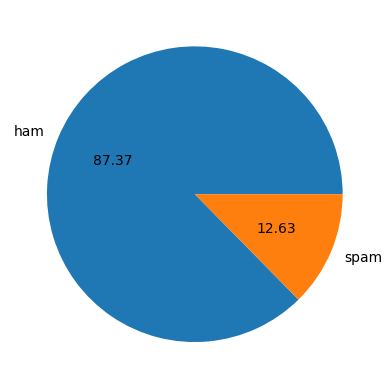

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

So 87.37% of the messages in our Dataset are ham and 12.63% are spam, i.e., the data is imbalanced

In [17]:
import nltk

In [18]:
#fetching number of characters in each message
df['num_characters'] = df['message'].apply(len)

In [19]:
df.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#fetching number of words
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
#fetching number of sentences
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#describing ham messages 
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#describing spam messages 
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

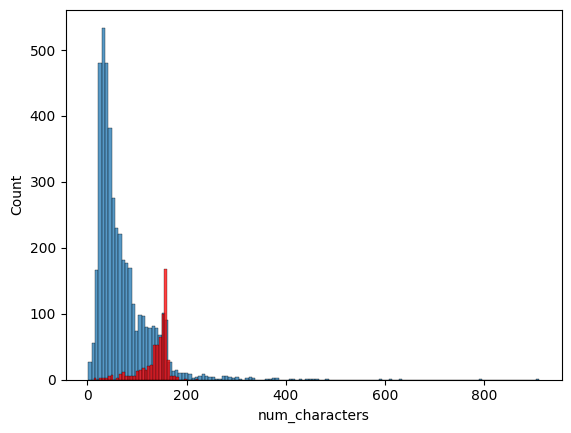

In [28]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

From the graph, we can see that most of the ham messages have fewer characters, whereas most of the spam messages contain more characters.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

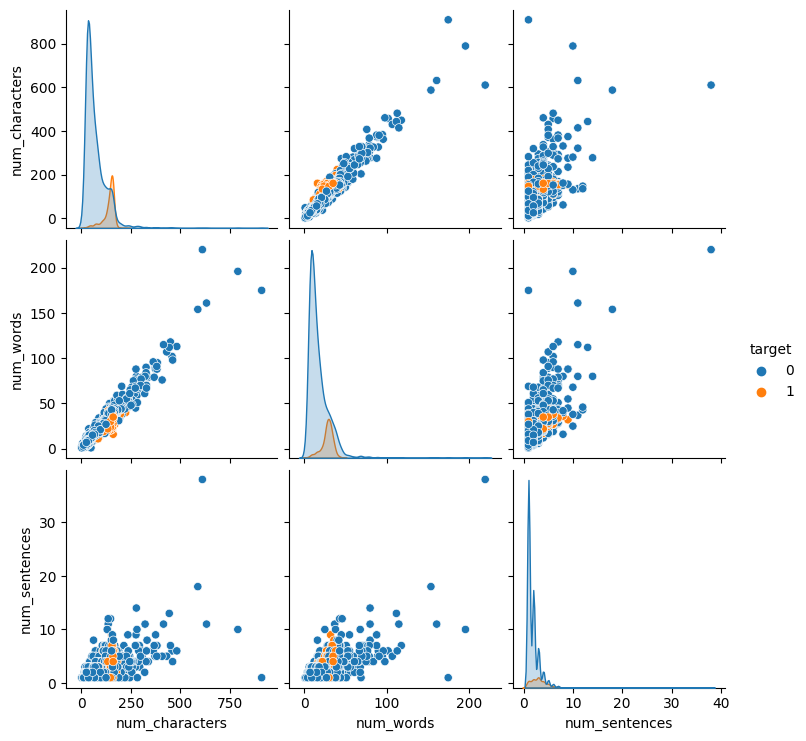

In [29]:
sns.pairplot(df, hue='target')

<Axes: >

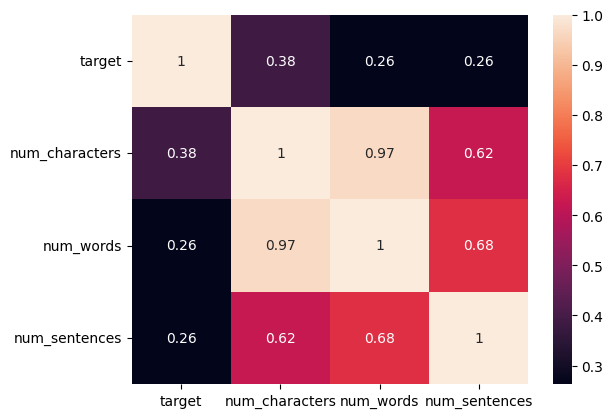

In [30]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# Data Preprocessing


* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuations
* Stemming

In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
import string

In [32]:
def transform_text(text):
    text =text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
df['transformed_message'] = df['message'].apply(transform_text)

In [34]:
df.head()

,target,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
#wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white')

In [36]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_message'].str.cat(sep = " "))

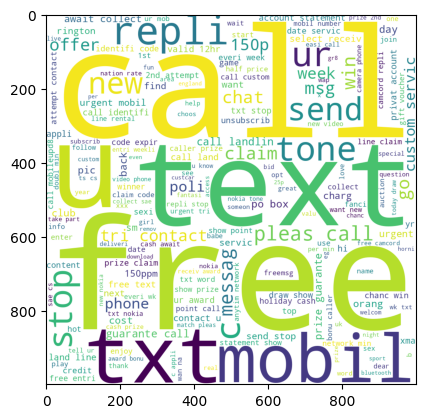

In [37]:
plt.imshow(spam_wc)

Highlights the words mostly used in spam messages

In [38]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_message'].str.cat(sep = " "))

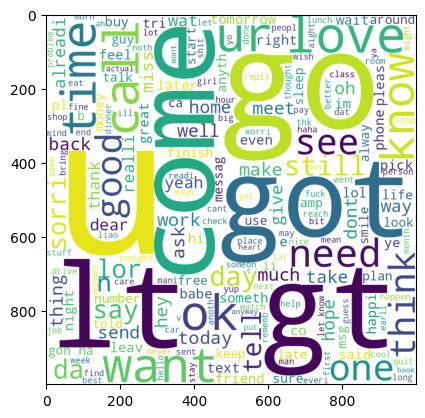

In [39]:
plt.imshow(ham_wc)

Highlights the words mostly used in ham messages

In [40]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

<Axes: xlabel='Word', ylabel='Count'>

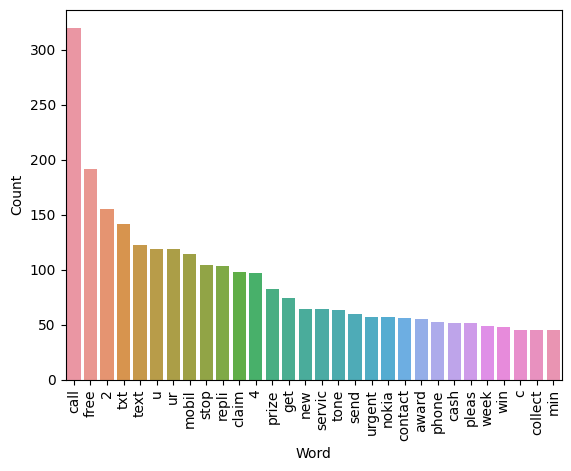

In [42]:
#Finding the top words used in spam messages
from collections import Counter
top_30_spam_words = pd.DataFrame(
    Counter(spam_corpus).most_common(30), 
    columns=['Word', 'Count']
)
plt.xticks(rotation = 'vertical')
sns.barplot(x='Word', y = 'Count', data=top_30_spam_words)

In [43]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

<Axes: xlabel='Word', ylabel='Count'>

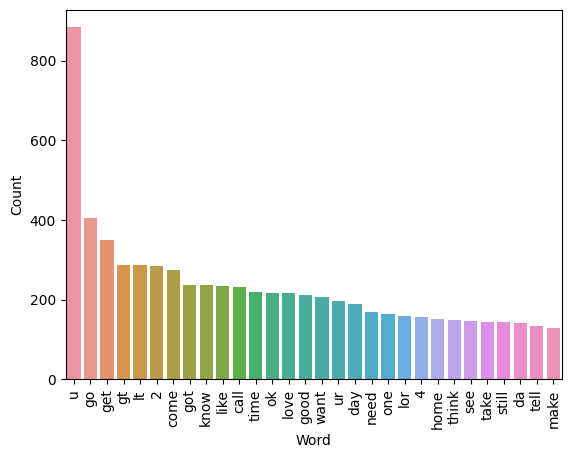

In [44]:
#Finding the top words used in ham messages
from collections import Counter
top_30_ham_words = pd.DataFrame(
    Counter(ham_corpus).most_common(30), 
    columns=['Word', 'Count']
)
plt.xticks(rotation = 'vertical')
sns.barplot(x='Word', y = 'Count', data=top_30_ham_words)

# Model Building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
Tfidf = TfidfVectorizer(max_features = 3000)

In [46]:
X = Tfidf.fit_transform(df['transformed_message']).toarray()

In [47]:
Y = df['target'].values

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [50]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [53]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [54]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Tfidf --> MNB gives best precision

# Improving Model Performance

Making max_feature = 3000 improves accuracy from 95.93% to 97.09%

# Testing the model on new data

In [55]:

input_msg = ('Your payment details are EXPIRED. Click this link NOW to update and SAVE your account from immediate closure. FREE gift if you act in 10 minutes!')
transformed_input_msg = transform_text(input_msg)
vector_input = Tfidf.transform([transformed_input_msg])
result = mnb.predict(vector_input)[0]
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Spam


In [56]:

input_msg = ("Hi Team, The new copy for the banner ads is approved. Please start deploying immediately. Let me know when it's live. Thanks, Dave")
transformed_input_msg = transform_text(input_msg)
vector_input = Tfidf.transform([transformed_input_msg])
result = mnb.predict(vector_input)[0]
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Not Spam


In [57]:
input_msg = ("")
transformed_input_msg = transform_text(input_msg)
vector_input = Tfidf.transform([transformed_input_msg])
result = mnb.predict(vector_input)[0]
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Not Spam
